# Trabalho de Análise Exploratória de Dados e Visualização

## Equipe:

Fernanda Luísa Silva Gomes <br>
João Lucas Duim

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import geopandas as gpd
from matplotlib.cm import ScalarMappable

## Escolha e leitura da base de dados

A base de dados escolhida está disponível [aqui](https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil) e é referente a queimadas no Brasil de $1998$ a $2017$, coletadas do [site](http://dados.gov.br/dataset/sistema-nacional-de-informacoes-florestais-snif) oficial do governo brasileiro. Inicialmente, leremos a base de dados e excluiremos dados incompletos.

In [2]:
df = pd.read_csv('amazon.csv').dropna()
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


A base de dados possui cinco colunas, sendo duas variáveis categóricas e três numéricas. As variáveis categóricas são state e month. As variáveis numéricas são year, number e date. 

In [3]:
df.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


## Gráficos com boas práticas

Inicialmente, plotaremos um gráfico de colunas com a função explanatória de informar o número médio de queimadas no Brasil por mês de $1998$ a $2017$. 

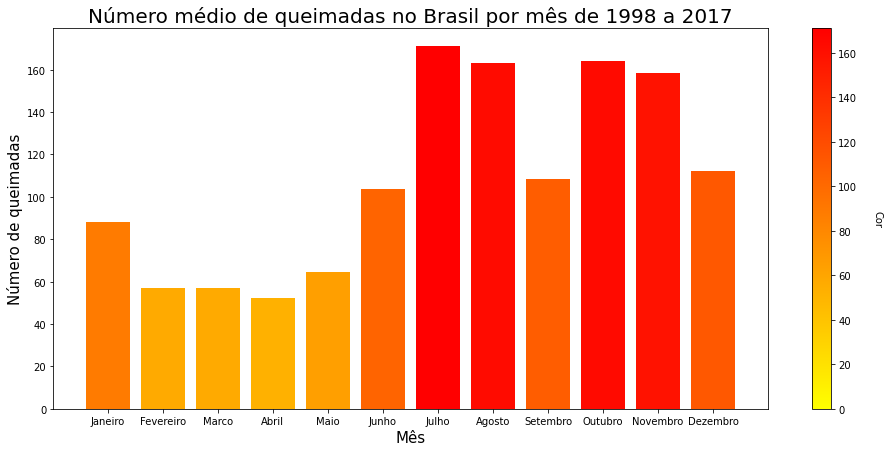

In [4]:
result = df.groupby(['month'])['number'].mean().reindex(['Janeiro','Fevereiro','Marco','Abril','Maio','Junho','Julho','Agosto',
                                                    'Setembro','Outubro','Novembro','Dezembro'])

data_x = result.index
data_hight = result.values
data_hight_normalized = [x / max(data_hight) for x in data_hight]

fig, ax = plt.subplots(figsize=(16, 7))

color_map = plt.cm.get_cmap('autumn')
my_cmap = color_map.reversed()

colors = my_cmap(data_hight_normalized)

rects = ax.bar(data_x, data_hight, color=colors)

sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(data_hight)))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Cor', rotation=270,labelpad=25)

plt.xticks(data_x)    
plt.xlabel('Mês', fontsize = 15)
plt.ylabel('Número de queimadas', fontsize = 15)
plt.title('Número médio de queimadas no Brasil por mês de 1998 a 2017', fontsize = 20)
plt.show()

No gráfico de colunas acima, foram utilizadas as variáveis month e number da base de dados, obtendo a média de todos os valores da segunda para cada categoria da primeira. A partir disso, mapeou-se visualmente as seguintes variáveis: cada mês foi representado por uma coluna; a altura da coluna expressa o número de queimadas no mês correspondente; as escalas de cores remetem às cores do fogo, indo do amarelo ao laranja e ao vermelho, crescente com o número de queimadas, as quais também remetem a um nível de criticidade e alarme.

Nota-se que os quatro meses com maior média de queimadas são julho, agosto, outubro e novembro. Além disso, percebe-se que o número de queimadas é mais acentuado no segundo semestre do ano que no primeiro.

Plotaremos, agora, um gráfico de colunas com a função de informar o número médio de queimadas no Brasil por região de $1998$ a $2017$.

In [5]:
Region_state = {'Acre':'Norte', 'Amapa':'Norte', 'Amazonas':'Norte', 'Pará': 'Norte', 'Rondonia': 'Norte', 'Roraima': 'Norte',
                 'Tocantins': 'Norte', 'Alagoas': 'Nordeste', 'Bahia': 'Nordeste', 'Ceara': 'Nordeste', 'Maranhao': 'Nordeste',
                 'Paraiba': 'Nordeste', 'Pernambuco': 'Nordeste', 'Piaui': 'Nordeste', 'Sergipe': 'Nordeste', 
                 'Distrito Federal': 'Centro-Oeste', 'Goias': 'Centro-Oeste', 'Mato Grosso': 'Centro-Oeste',
                 'Rio de Janeiro': 'Sudeste', 'Sao Paulo': 'Sudeste', 'Minas Gerais': 'Sudeste', 'Espirito Santo': 'Sudeste',
                 'Santa Catarina': 'Sul', 'Parana': 'Sul', 'Rio Grande do Sul': 'Sul'}

df['region'] = df['state'].map(Region_state)

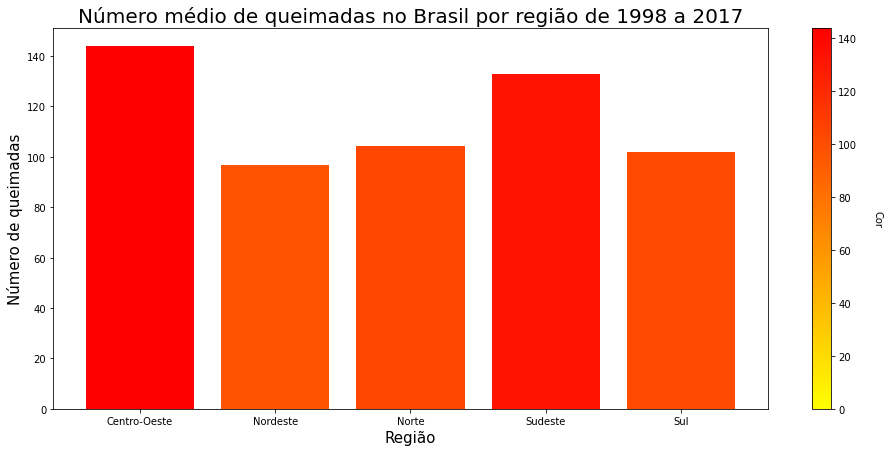

In [6]:
result = df.groupby(['region'])['number'].mean()

data_x = result.index
data_hight = result.values
data_hight_normalized = [x / max(data_hight) for x in data_hight]

fig, ax = plt.subplots(figsize=(16, 7))

color_map = plt.cm.get_cmap('autumn')
my_cmap = color_map.reversed()

colors = my_cmap(data_hight_normalized)

rects = ax.bar(data_x, data_hight, color=colors)

sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(data_hight)))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Cor', rotation=270,labelpad=25)

plt.xticks(data_x)    
plt.xlabel('Região', fontsize = 15)
plt.ylabel('Número de queimadas', fontsize = 15)
plt.title('Número médio de queimadas no Brasil por região de 1998 a 2017', fontsize = 20)
plt.show()

No gráfico de colunas acima, foram utilizadas as variáveis state e number da base de dados, obtendo-se a média de todos os valores da segunda para cada agrupamento de categorias da primeira, seguindo a divisão do país nas $5$ regiões macroeconômicas (Centro-Oeste, Nordeste, Norte, Sudeste, Sul). A partir disso, mapeou-se visualmente as seguintes variáveis: cada região foi representada por uma coluna; a altura da coluna expressa o número de queimadas no mês correspondente; as escalas de cores remetem às cores do fogo, indo do amarelo ao laranja e ao vermelho, crescente com o número de queimadas, as quais também remetem a um nível de criticidade e alarme.

Atráves do gráfico, nota-se que as regiões Centro-Oeste e Sudeste são as com maior média de queimadas. Na região Centro-Oeste, encontram-se o Cerrado e o Pantanal, que sofrem desmatamentos ilegais para agricultura e pecuária. Já na região Sudeste, parte das queimadas são praticadas com intuito de limpar pastagens e parte ocorre de forma acidental ou criminosa que incendeiam a vegetação no período de seca e tomam grandes proporções.

## Storytelling

Exploraremos os dados em questão com o intuito de responder as seguintes questões:

É observada uma tendência de crescimento no número de queimadas no Brasil ao longo dos anos? <br>
Quais estados mais contribuíram para a observação dessa tendência?

Vejamos alguns fatos a respeito das queimadas no Brasil:

A prática de atear fogo para abrir espaço para pastagens, eliminar ervas daninhas ou até adicionar nutrientes ao solo oriundos do material vegetal queimado é amplamente utilizada na agricultura brasileira. Apesar de trazerem resultados a curto prazo, essas queimadas podem acelerar o processo de erosão do solo, retirar nutrientes como o nitrogênio, o fósforo e o potássio e exterminar microrganismos que auxiliam no processo de desenvolvimento das plantas. O impacto das queimadas varia de acordo com o bioma. A Amazônia é bastante sensível ao fogo, diferente do Cerrado, que tem maior capacidade de recuperação da vegetação após incêndios. As queimadas reduzem a capacidade de conservação da floresta e provocam perdas significativas na biodiversidade, de acordo com o artigo Anthropogenic disturbance in tropical forests can double biodiversity loss from deforestation, publicado na revista Nature em $2016$. Em uma publicação mais recente, de $2018$, pesquisadores estimaram que as queimadas na Amazônia podem afetar as taxas de mortalidade e de crescimento das árvores por mais de uma década. Essas conclusões constam no artigo Drought-induced Amazonian wildfires instigate a decadal-scale disruption of forest carbon dynamics, publicado na revista Philosophical Transactions of the Royal Society B. Porém, a prática de limpeza de pasto não é a única causadora de focos de incêndio. O fogo também é utilizado de forma criminosa para queimar florestas já derrubadas ou em regiões cuja mata ainda está de pé.

O Código Florestal (Lei nº $12.651/2012$) proíbe o uso de fogo na vegetação, exceto em alguns casos e com apresentação de uma justificativa de seu emprego ou em atividades de pesquisa científica. Nos casos permitidos, a lei ainda determina que o incêndio deve ser autorizado previamente por um órgão ambiental — o ICMBio (Instituto Chico Mendes de Conservação da Biodiversidade), no âmbito federal, e órgãos estaduais ligados ao Sisnama (Sistema Nacional do Meio Ambiente). Também é preciso apresentar a essas autoridades um planejamento sobre o emprego do fogo e seu controle. O governo federal estipula períodos apropriados para as queimadas, uma vez que o efeito do fogo sobre a vegetação pode variar em função das condições ambientais e meteorológicas, como velocidade do vento, umidade do ar e umidade do solo. Na época da seca, geralmente entre agosto e outubro, as queimadas não são permitidas.

Em $2010$, o IBGE (Instituto Brasileiro de Geografia e Estatística) estimou que as queimadas e o desmatamento foram responsáveis por $75\%$ das emissões de $CO_2$. O dado aparece nos Indicadores de Desenvolvimento Sustentável. Além de contribuir para o aumento do efeito estufa, as queimadas também prejudicam a flora da região, atingindo a vegetação de forma direta, e a fauna, podendo comprometer o abrigo e alimentação de animais. As cinzas das queimadas também geram prejuízos à saúde humana, afetando a qualidade do ar e contaminando a água, seja ela superficial ou subterrânea. O Ibama disponibiliza uma linha de telefone chamada “Linha Verde” ($0800$ $61$ $8080$) para denúncias de focos de incêndio. O órgão afirma que o serviço tem atendimento $24h$ e funciona em todo o Brasil. Além do Ibama, é possível denunciar incêndios, sejam eles urbanos ou em áreas de mata, aos órgãos ambientais estaduais e municipais, aos bombeiros, à Polícia Militar ou Civil e até à Defesa Civil.

Veja a seguir um gráfico do tipo lineplot utilizando-se os dados referentes aos anos $1998$ a $2017$. Foram utilizadas as variáveis year e number da base de dados referentes a cada ano especificado. A partir disso, mapeou-se visualmente as seguintes variáveis: no eixo das abscissas encontra-se o tempo em anos; no eixo das ordenadas encontra-se o total de queimadas; a linha do gráfico exibe a evolução do total de queimadas ao longo dos anos representados.

<Figure size 432x288 with 0 Axes>

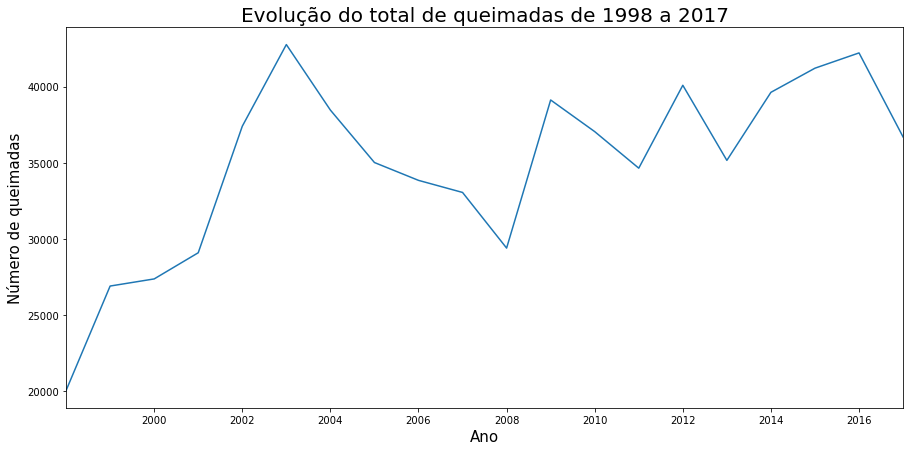

In [7]:
by_year = df.groupby(['year'], as_index=False).sum()

plt.figure()
plt.figure(figsize=[15,7])
plt.xlim([1998, 2017])
sns.lineplot(x='year', y='number', data=by_year)
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Número de queimadas', fontsize = 15)
plt.xticks([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016])
plt.title('Evolução do total de queimadas de 1998 a 2017', fontsize = 20)
plt.show()

O gráfico acima possibilita uma análise de tendência de crescimento no número total de queimadas com o passar dos anos, deixando claro que essa tendência sofre oscilações alternadas de forma significativa.

Veja a seguir gráficos do tipo heat map construídos sobre o mapa do Brasil dividido em estados utilizando-se os dados referentes aos anos $2000$, $2005$, $2010$ e $2015$. Foram utilizadas as variáveis state e number da base de dados referentes a cada ano especificado. A partir disso, mapeou-se visualmente as seguintes variáveis: no eixo das abscissas encontra-se a longitude; no eixo das ordenadas encontra-se a latitude; cada estado foi representado pela sua própria forma no mapa do Brasil; uma mesma cor preenche todo o estado; as escalas de cores vão do branco, passam por tons claros de vermelho e vão até o vermelho escuro, crescente com o número de queimadas; os tons de vermelho mais intensos também remetem a um nível de criticidade e alarme.

In [8]:
INFOS_UFS = gpd.read_file('bcim_2016_21_11_2018.gpkg', layer = 'lim_unidade_federacao_a')

Sigla = {'Acre':'AC', 'Alagoas':'AL', 'Amapa':'AP', 'Amazonas':'AM', 'Bahia':'BA', 'Ceara':'CE', 'Distrito Federal':'DF',
         'Espirito Santo':'ES', 'Goias':'GO', 'Maranhao':'MA', 'Mato Grosso':'MT', 'Mato Grosso do Sul':'MS',
         'Minas Gerais':'MG', 'Para':'PA', 'Paraiba':'PB', 'Paraná':'PR', 'Pernambuco':'PE', 'Piauí':'PI',
         'Roraima':'RR', 'Rondonia':'RO', 'Rio de Janeiro':'RJ', 'Rio Grande do Norte':'RN', 'Rio Grande do Sul':'RS',
         'Santa Catarina':'SC', 'Sao Paulo':'SP', 'Sergipe':'SE', 'Tocantins':'TO'}

def plot(year):
    query = 'year ==' + str(year)
    df_year = df \
        .query(query) \
        .groupby('state', as_index = False) \
        .agg({'number' : 'sum'}) \
        .sort_values('number', ascending = False)
    df_year['sigla'] = df_year['state'].map(Sigla)
    brasil_year = INFOS_UFS.merge(df_year, on = 'sigla', how = 'left')
    
    %matplotlib inline
    plt.figure()
    brasil_year.plot(column = 'number',
                     cmap = 'Reds',
                     figsize = (16,10),
                     legend = True,
                     edgecolor = 'black',
                     legend_kwds={'label': "Número de queimadas"},
                    vmax = 7000)
    plt.xlabel('Longitude', fontsize = 15)
    plt.ylabel('Latitude', fontsize = 15)
    plt.title('Número de queimadas no Brasil por região em ' + str(year), fontsize = 20)
    plt.show()

<Figure size 432x288 with 0 Axes>

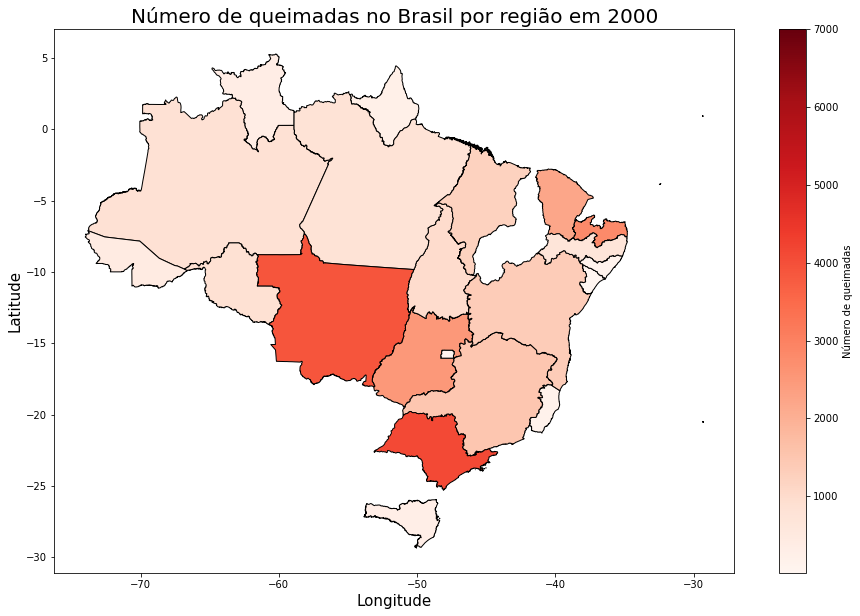

In [9]:
plot(2000)

<Figure size 432x288 with 0 Axes>

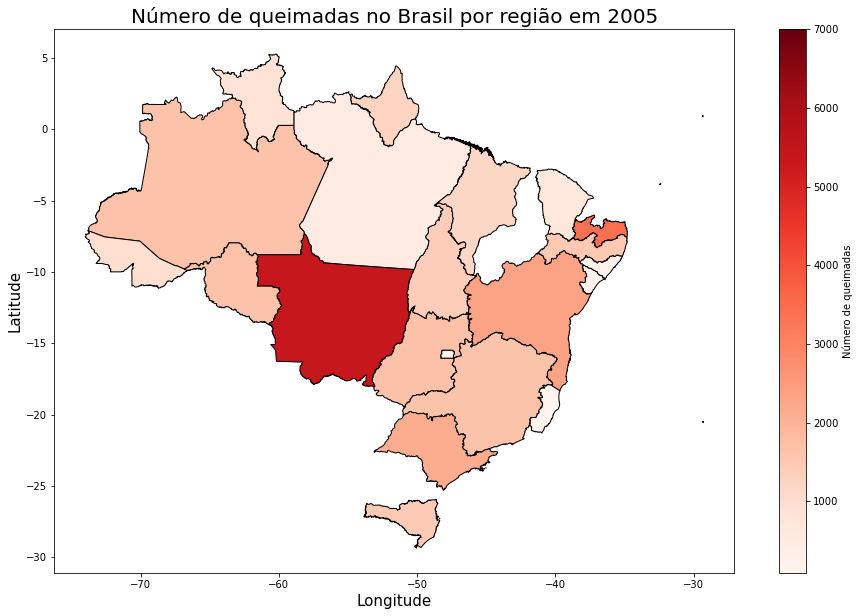

In [10]:
plot(2005)

<Figure size 432x288 with 0 Axes>

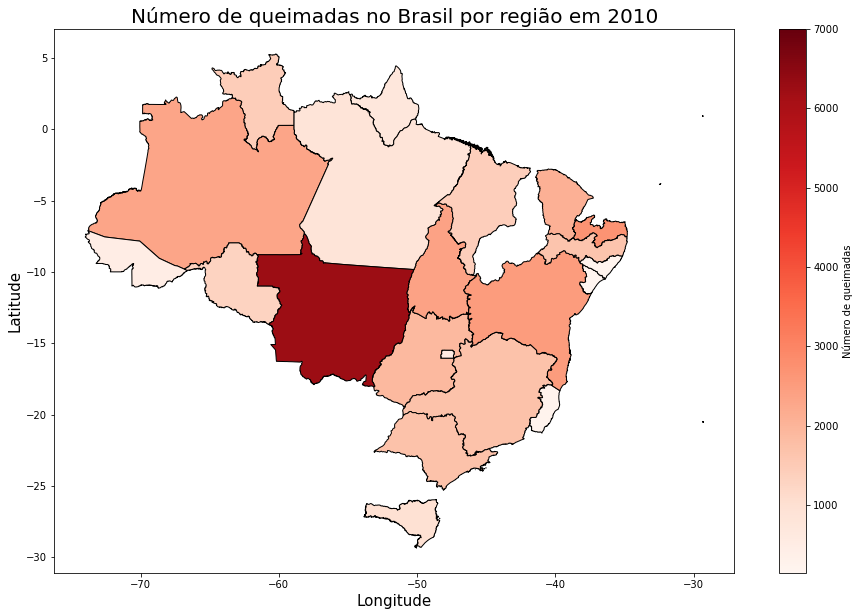

In [11]:
plot(2010)

<Figure size 432x288 with 0 Axes>

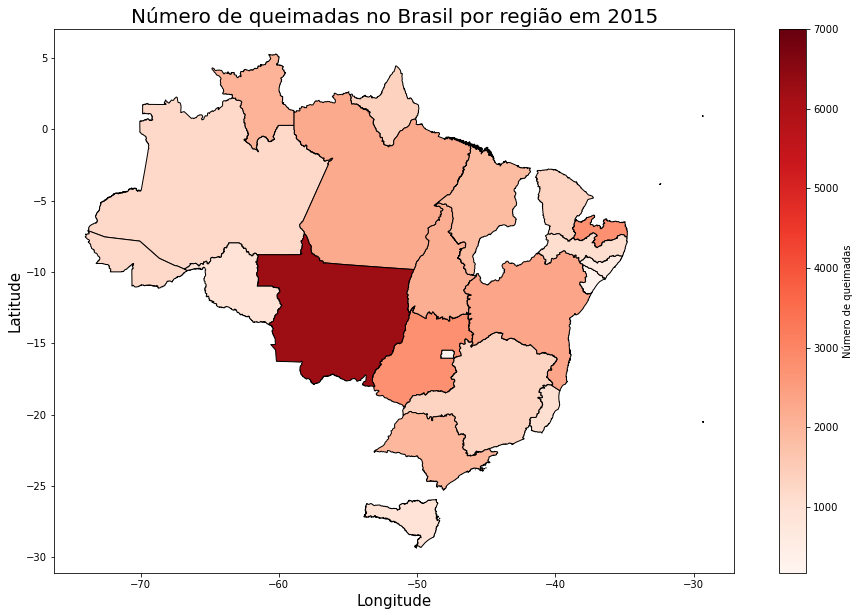

In [12]:
plot(2015)

Os gráficos acima evidenciam que o estado de Mato Grosso tem uma contribuição significativa (a mais elevada) no número de queimadas. Isso ocorre pelas queimadas intensas que o Pantanal sofre principalmente pelo expressivo e expansivo cultivo de soja no estado. 

## Gráfico complementar

Veja a seguir um gráfico do tipo barplot utilizando-se os dados referentes aos anos  1998  a  2017. Foram utilizadas as variáveis state e number da base de dados. A partir disso, mapeou-se visualmente as seguintes variáveis: no eixo das abscissas encontram-se os estados; no eixo das ordenadas encontra-se o número médio de queimadas; as cores foram utilizadas de forma a destacar os $3$ estados mais afetados com vermelho, indicando maior nível de criticidade e alerta.

Text(-15.450000000000003, 0.5, 'Número de queimadas')

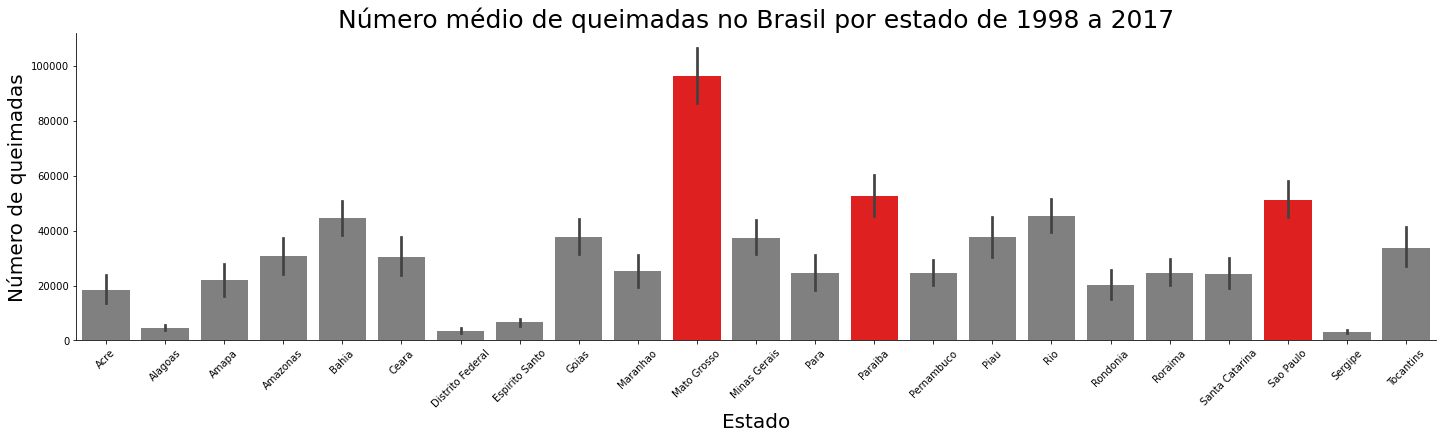

In [13]:
by_state = df.groupby(['state'], as_index=False).mean()
l = 10 * ['gray'] + ['red'] + 2 * ['gray'] + ['red'] + 6 * ['gray'] + ['red'] + 2 * ['gray']

sns.catplot(x='state', 
            y='number', 
            data=df[['state','number']], 
            kind='bar', 
            aspect=4, 
            estimator=sum, 
            legend=True, 
            palette=sns.color_palette(l))

plt.title('Número médio de queimadas no Brasil por estado de 1998 a 2017', fontsize = 25)
plt.xticks(rotation=45)
plt.xlabel('Estado', fontsize = 20)
plt.ylabel('Número de queimadas', fontsize = 20)

## Comentários gerais

A análise dos dados feita acima permitiu conhecer melhor os fatos a respeito das queimadas que ocorrem no Brasil. Explorando por meio de técnicas de visualização, foi possível responder as perguntas desejadas. Notou-se com clareza a preocupante tendência de aumento no número anual de queimadas pelo país, além de reconhecer que os estados do Mato Grosso, Paraíba e São Paulo são os mais atingidos pela prática no período analisado. Essas conclusões se mostram extremamente valiosas, pois servem de alerta aos órgãos responsáveis a respeito das consequências desastrosas das queimadas a curto e longo prazo e servem de apoio para a confecção de estratégias a fim de realocar a fiscalização ambiental para os locais mais críticos.

O trabalho possibilitou que o grupo conhecesse profundamente as boas práticas envolvidas no processo de análise visual de dados, incluindo como fazer um storytelling interessante e assertivo e como manipular os dados e as características dos gráficos utilizando uma linguagem de programação. Além disso, discutiu-se as principais conclusões que podem ser obtidas por meio desses processos, as quais geralmente não são possíveis de ser obtidas sem o auxílio dessas técnicas.

O trabalho foi realizado por chamadas de vídeo. A dupla discutia qual a melhor maneira de explorar e apresentar o que foi pedido. Desse modo, ambos os alunos sabiam e participavam do que estava sendo realizado.

## Bibliografia

https://medium.com/resumos-resenhas/storytelling-com-dados-resumo-fd63ebe4f704 <br>
https://towardsdatascience.com/handling-plot-axis-spines-in-python-f143b8554da2 <br>
https://medium.com/analytics-vidhya/fastest-way-to-install-geopandas-in-jupyter-notebook-on-windows-8f734e11fa2b <br>
https://www.aosfatos.org/noticias/desenhamos-fatos-sobre-as-queimadas-no-brasil/ <br>
https://matplotlib.org/stable/index.html <br>
https://seaborn.pydata.org/generated/seaborn.catplot.html <br>